# Automatic Approach to Calculate Displacement & Throw on Thrust Faults - 
## *Synthetic Models*

## A Case Study on coalmines dataset from Ruhr coalfield in the lower Rhine basin, Germany.  

***By: Ramy Abdallah***

![Thrust Faults Structures](https://i.imgur.com/sxbmFZ8.jpg)

## Introduction

Faults are fractures along which movement of one block with respect to others has taken place. Thrust faults are faults with a very small angle where the hanging wall relatively goes up with respect to the footwall. The hanging wall is the upper bock on the fault plane, although the footwall is the lower block. To understand the thrust growth, geometry and kinematics, we apply structural analyses. These analyses include displacement, throw and heave. The displacement is the offset of the hanging wall from the footwall along the fault plane. However, the throw is the vertical displacement between the hanging wall and the footwall, although the heave is the horizontal displacement between the hanging wall and footwall. 

In this notebook, we will calculate the displacement and throw from a selected 2D cross-section in our subsurface models. The following diagram explains the basic ideas of the structural analyses. For more information, see https://www.geographynotes.com/geology-2/faults-definition-parts-and-types-structural-geology/1247

![Thrust Faults Structures](https://i.imgur.com/8Ossptx.jpg)
Source https://cdn.britannica.com/45/345-050-226C3D01/Types-earthquakes-faulting-rock-masses-each-other.jpg

## Objective

Our main objective is to create an intuitive approach to calculating the displacement and throw from form 2D  subsurface cross-section. This automatic workflow is essential to increase the speed of the structural analyses, which can be used to validate the subsurface interpretation. 

## Data

The 2D subsurface models used in this notebook are in data format (.dat). We will start the calculation with a synthetic model with one layer, followed by a multi-layered one, and then apply it to a real-world cross-section from the Ruhr subbasin.

## Libraries

In this study we are going to use mainly `numpy` libarary.

`NumPy` is the most important Python package for scientific computing. It's a Python library that includes a multidimensional array object, derived objects, such as mathematical, logical, shape manipulation, sorting, selecting, basic linear algebra, basic statistical operations, random simulation, and more.

#### Numpy

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import style
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

sns.set()

In [2]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

## Project Generalised Workflow

>1. **Load, read and explore the data**
>2. **Displacement and throw calculation on one-layer synthetic model**
>3. **Displacement and throw calculation on multi-layer synthetic model**
>4. **Summarize inferences & write a conclusion**

## Methods

### 1. Load, read and explore the data

### One Layer Synthetic Model

#### Download the 2D Geological Models as Data files

We read, explore, clean and visualise the subsurface model that we want to calculate the displacement and throw. For a detailed explanation, please read the 2D and 3D visualisation notebooks.

In [3]:
filepath = r'C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\data\fault_model_13012020.dat'

with open(filepath, "r") as file:  # opens the file at given filepath
    lines = file.readlines()  # read all lines from file, then store in list

In [4]:
print("Number of lines:", len(lines), "\n")
print("first 10 lines:\n")
lines[:5]

Number of lines: 10989 

first 10 lines:



['x\ty\tz\tName\n',
 '590.6091\t-2000.0000\t-1363.1394\tFault\n',
 '682.1457\t-2000.0000\t-1322.8769\tFault\n',
 '773.6822\t-2000.0000\t-1282.6145\tFault\n',
 '865.2187\t-2000.0000\t-1242.3520\tFault\n']

In [5]:
for i, line in enumerate(lines):  # iterate over every line
    lines[i] = line.rstrip("\n")  # strip away the \n from the right of the string
    
lines[:5]

['x\ty\tz\tName',
 '590.6091\t-2000.0000\t-1363.1394\tFault',
 '682.1457\t-2000.0000\t-1322.8769\tFault',
 '773.6822\t-2000.0000\t-1282.6145\tFault',
 '865.2187\t-2000.0000\t-1242.3520\tFault']

In [6]:
lines[:5]

['x\ty\tz\tName',
 '590.6091\t-2000.0000\t-1363.1394\tFault',
 '682.1457\t-2000.0000\t-1322.8769\tFault',
 '773.6822\t-2000.0000\t-1282.6145\tFault',
 '865.2187\t-2000.0000\t-1242.3520\tFault']

After we download our one layer model let us download our multi-layered model.

### Multi Layer Synthetic Model

#### Download the 2D Geological Models as Data files

Opens the file at given file path and read all lines from file, then store them into a list.

In [7]:
filepath = r'C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\data\fault_model_15012020.dat'

with open(filepath, "r") as file:  
    lines = file.readlines() 

In [8]:
print("Number of lines:", len(lines), "\n")
print("first 10 lines:\n")
lines[:5]

Number of lines: 10989 

first 10 lines:



['x\ty\tz\tName\n',
 '590.6091\t-2000.0000\t-1363.1394\tFault\n',
 '682.1457\t-2000.0000\t-1322.8769\tFault\n',
 '773.6822\t-2000.0000\t-1282.6145\tFault\n',
 '865.2187\t-2000.0000\t-1242.3520\tFault\n']

In [9]:
for i, line in enumerate(lines):  # iterate over every line
    lines[i] = line.rstrip("\n")  # strip away the \n from the right of the string
    
lines[:5]

['x\ty\tz\tName',
 '590.6091\t-2000.0000\t-1363.1394\tFault',
 '682.1457\t-2000.0000\t-1322.8769\tFault',
 '773.6822\t-2000.0000\t-1282.6145\tFault',
 '865.2187\t-2000.0000\t-1242.3520\tFault']

After we download our two models, let us focus on the one layer model then the multi-layer model.

### 2. One-Layer Synthetic Model

Let us explore, display and visualise our one layer model.

In [10]:
file_header = lines[:1]
file_grid = lines[1:]

In [11]:
count_faults = []  # this is going to be our storage list
for line in file_grid:  # iterate over every line in the grid part of the file
    line_values = line.split("\t")  # split current line into its separate values
                                   # with an empty space " " as delimiter
    for count_fault in line_values: # iterate over every value in the line
        count_faults.append((count_fault))  # convert value from str into float
                                         # and append to our z_values list

In [12]:
count_faults[:5]

['590.6091', '-2000.0000', '-1363.1394', 'Fault', '682.1457']

In [13]:
print(count_faults.count('Horizon_10'))

1999


In [14]:
fault_grid = file_grid[:357]

In [15]:
fault_grid[:5]

['590.6091\t-2000.0000\t-1363.1394\tFault',
 '682.1457\t-2000.0000\t-1322.8769\tFault',
 '773.6822\t-2000.0000\t-1282.6145\tFault',
 '865.2187\t-2000.0000\t-1242.3520\tFault',
 '956.7552\t-2000.0000\t-1202.0896\tFault']

In [16]:
for i, line in enumerate(fault_grid):  
    fault_grid[i] = line.rstrip("\tFault")

In [17]:
xyzfault_values = []  # this is going to be our storage list
for line in fault_grid:  # iterate over every line in the grid part of the file
    line_values = line.split("\t")  # split current line into its separate values
                                   # with an empty space " " as delimiter
    for xyz_value in line_values: # iterate over every value in the line
        xyzfault_values.append(float(xyz_value))  # convert value from str into float
                                         # and append to our z_values list

In [18]:
xyzfault_values[:5]

[590.6091, -2000.0, -1363.1394, 682.1457, -2000.0]

Let us separate the fault data from the horizons data and store the 'x', 'y' and 'z' data in a separate variable.  

In [19]:
xyzfault_values
f_x = xyzfault_values[::3]
f_y = xyzfault_values[1::3]
f_z = xyzfault_values[2::3]

In [20]:
f_y[:5]

[-2000.0, -2000.0, -2000.0, -2000.0, -2000.0]

Now let us visualise our fault model

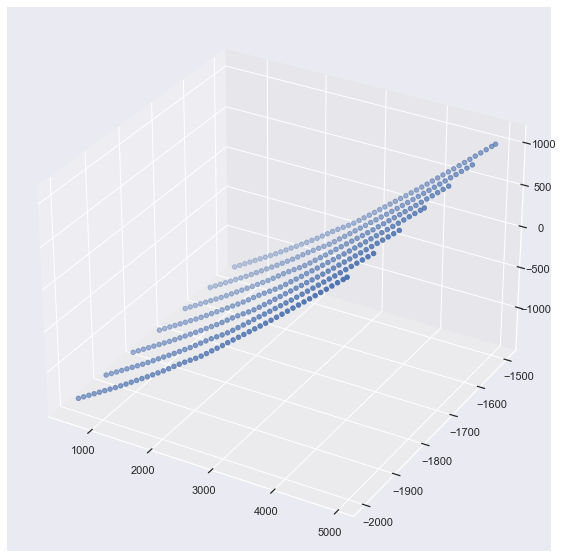

In [21]:
%matplotlib inline
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(f_x,f_y,f_z,);

After that let us work on the horizon data by clean, separate and visualise it

In [22]:
count_hz1values = []  # this is going to be our storage list
for line in file_grid:  # iterate over every line in the grid part of the file
    line_values = line.split("\t")  # split current line into its separate values
                                   # with an empty space " " as delimiter
    for count_hz1 in line_values: # iterate over every value in the line
        count_hz1values.append((count_hz1))  # convert value from str into float
                                         # and append to our z_values list

In [23]:
count_hz1values[:5]

['590.6091', '-2000.0000', '-1363.1394', 'Fault', '682.1457']

In [24]:
print(count_hz1values.count('Horizon_01'))

1979


In [25]:
hz1_grid = file_grid[357:2336]

In [26]:
hz1_grid[:5]

['4208.3953\t-1589.1316\t709.5694\tHorizon_01',
 '4256.9916\t-1580.5580\t680.3752\tHorizon_01',
 '4225.9365\t-1546.2883\t697.3488\tHorizon_01',
 '4237.2323\t-1610.7444\t693.0730\tHorizon_01',
 '4281.4717\t-1631.5641\t671.8816\tHorizon_01']

In [27]:
for i, line in enumerate(hz1_grid):  
    hz1_grid[i] = line.rstrip("\tHorizon_01")

In [28]:
xyzhz1_values = []  # this is going to be our storage list
for line in hz1_grid:  # iterate over every line in the grid part of the file
    line_values = line.split("\t")  # split current line into its separate values
                                   # with an empty space " " as delimiter
    for xyz_value in line_values: # iterate over every value in the line
        xyzhz1_values.append(float(xyz_value))  # convert value from str into float
                                         # and append to our z_values list

In [29]:
xyzhz1_values[:5]

[4208.3953, -1589.1316, 709.5694, 4256.9916, -1580.558]

Let us separate the horizon data from the fault data and store the 'x', 'y' and 'z' data in a separate variable.  

In [30]:
xyzhz1_values
hz1_x = xyzhz1_values[::3]
hz1_y = xyzhz1_values[1::3]
hz1_z = xyzhz1_values[2::3]

Now let us visualise our horizon model with the fault model

<IPython.core.display.Javascript object>


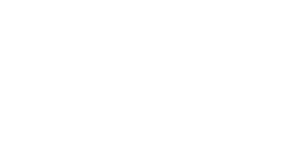

In [31]:
%matplotlib notebook
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hz1_x,hz1_y,hz1_z)
ax.scatter(f_x,f_y,f_z,)
ax.scatter(f_x,f_y,f_z,c=np.linalg.norm([f_x,f_y,f_z], axis=0));

Moreover, let us display our model in 2D view

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_2364\1161935773.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im, label="y-values")


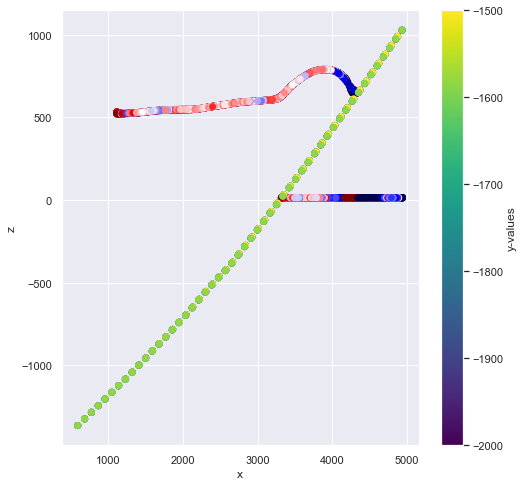

In [32]:
%matplotlib inline
plt.figure(figsize=(8,8))
im = plt.scatter(hz1_x,hz1_z, c=hz1_y,cmap="seismic")
im = plt.scatter(f_x,f_z,c=f_y,cmap="viridis")
plt.colorbar(im, label="y-values")
plt.xlabel("x")
plt.ylabel("z");

#### Displacement and Throw Calculation

The fault plane in this synthetic model is built on a 45-degree dip. As a result, the displacement equals the throw and heave (a/sin45 = b/sin45 = c). First, to calculate the throw, we need to access the data points of the hanging wall and the footwall separately. Second, we need to select the first point on the hanging wall and footwall. Lastly, we deduct the hanging wall value from the footwall value to calculate the throw.

Let us start by getting the first point in the hanging wall, which is the maxium point.

In [33]:
hz1_zhw = max(hz1_z)

Then let us get the first point in the footwall, which is the minumum point.

In [34]:
hz1_zfw = min(hz1_z)

Finally let us get the throw by subduct the hanging wall value from the footwall value

In [35]:
throw = hz1_zhw - hz1_zfw

To calculate the distance, we need to assign a reference point on top of the fault, which we name “RP”. We will place the reference point “RP” on top of the fault and access this point by indexing to the first point. 

In [36]:
RP = f_z[-1]

Second, we get the distance by deducting the reference point from the first point in the hanging wall.

In [37]:
dist_hz1 = RP - hz1_zhw

Finally let us print the calculated values

In [38]:
print("RP: " + format(round(RP)))
print("throw: " + format(round(throw)))
print("distance_hz1: " + format(round(dist_hz1)))

RP: 1028
throw: 777
distance_hz1: 237


### 3. Multi-Layer Synthetic Model

Now let us explore and work on the multi-layer model. Starting by dropping the first and last rows of the model.

In [39]:
file_header = lines[:1]
file_grid = lines[1:]

First we create a storage list and iterate over every line in the model part of the file. Then we split current line into its separate values with an "\t" and empty space " ". Moreover we iterate over every value in the line and convert value from string into float and append to our "z" values list.

Let us start by the fault data points.

In [40]:
count_faults = []  
for line in file_grid: 
    line_values = line.split("\t")  
                                   
    for count_fault in line_values: 
        count_faults.append((count_fault))  

Here we view the number of data points of the fault plane.

In [41]:
count_faults[:5]

['590.6091', '-2000.0000', '-1363.1394', 'Fault', '682.1457']

We can also print the number of strings of "Horizon_10" in the fault data.

In [42]:
print(count_faults.count('Horizon_10'))

1999


Then let us get the number of "Fault" string in the fault data points. And getting the grid of the faults by just indexing the faults strings as follow.

In [43]:
print(count_faults.count('Fault'))

357


In [44]:
fault_grid = file_grid[:357]

In [45]:
fault_grid[:5]

['590.6091\t-2000.0000\t-1363.1394\tFault',
 '682.1457\t-2000.0000\t-1322.8769\tFault',
 '773.6822\t-2000.0000\t-1282.6145\tFault',
 '865.2187\t-2000.0000\t-1242.3520\tFault',
 '956.7552\t-2000.0000\t-1202.0896\tFault']

Further, we create a loop to  iterate and then clean the "\tFault" string. Also we create a for loop to clean the data.

In [46]:
for i, line in enumerate(fault_grid):  
    fault_grid[i] = line.rstrip("\tFault")

In [47]:
xyzfault_values = []  # this is going to be our storage list
for line in fault_grid:  # iterate over every line in the grid part of the file
    line_values = line.split("\t")  # split current line into its separate values
                                   # with an empty space " " as delimiter
    for xyz_value in line_values: # iterate over every value in the line
        xyzfault_values.append(float(xyz_value))  # convert value from str into float
                                         # and append to our z_values list

In [48]:
xyzfault_values[:5]

[590.6091, -2000.0, -1363.1394, 682.1457, -2000.0]

Let us separate the horizon data from the fault data and store the 'x', 'y' and 'z' data in a separate variable. 

In [49]:
xyzfault_values
f_x = xyzfault_values[::3]
f_y = xyzfault_values[1::3]
f_z = xyzfault_values[2::3]

In [50]:
f_x[:1], f_y[:1], f_z[:1]

([590.6091], [-2000.0], [-1363.1394])

Now let us visualise our horizon model with the fault model

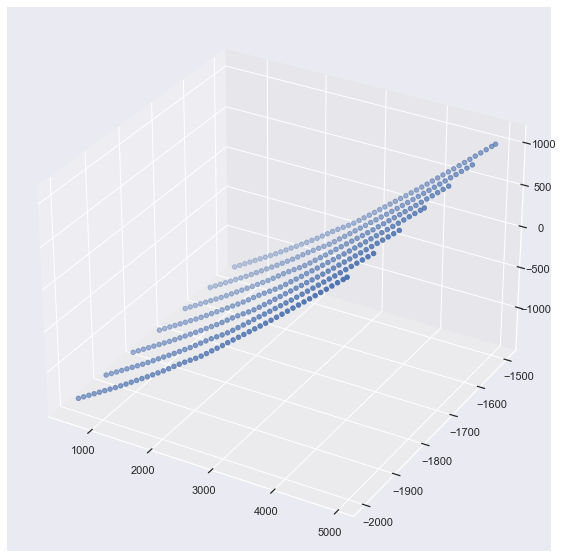

In [51]:
%matplotlib inline
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(f_x,f_y,f_z);

Here we use the same loop to clean the horizons data points.

In [52]:
count_hz1values = []  # this is going to be our storage list
for line in file_grid:  # iterate over every line in the grid part of the file
    line_values = line.split("\t")  # split current line into its separate values
                                   # with an empty space " " as delimiter
    for count_hz1 in line_values: # iterate over every value in the line
        count_hz1values.append((count_hz1))  # convert value from str into float
                                         # and append to our z_values list

In [53]:
count_hz1values[:5]

['590.6091', '-2000.0000', '-1363.1394', 'Fault', '682.1457']

Let us just separate the data points and store them in a list.

In [54]:
hz1_grid = file_grid[357:2336]

Additionally, we create a loop to clean the data points and visualise it.

In [55]:
for i, line in enumerate(hz1_grid):  
    hz1_grid[i] = line.rstrip("\tHorizon_01")

In [56]:
xyzhz1_values = []  # this is going to be our storage list
for line in hz1_grid:  # iterate over every line in the grid part of the file
    line_values = line.split("\t")  # split current line into its separate values
                                   # with an empty space " " as delimiter
    for xyz_value in line_values: # iterate over every value in the line
        xyzhz1_values.append(float(xyz_value))  # convert value from str into float
                                         # and append to our z_values list

In [57]:
xyzhz1_values
hz1_x = xyzhz1_values[::3]
hz1_y = xyzhz1_values[1::3]
hz1_z = xyzhz1_values[2::3]

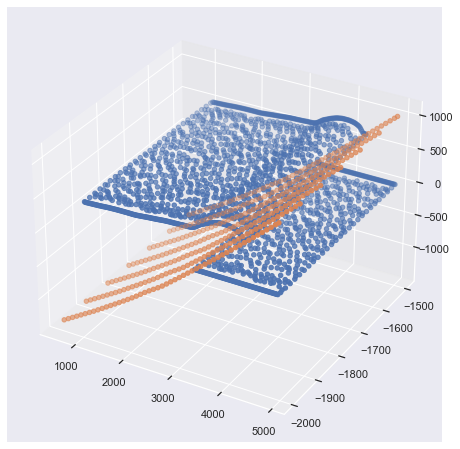

In [58]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(hz1_x,hz1_y,hz1_z)
ax1.scatter(f_x,f_y,f_z,)
ax.scatter(f_x,f_y,f_z,c=np.linalg.norm([f_x,f_y,f_z], axis=0))
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 2 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size) 

After all this perparation let us apply the same steps for all the other horizons.

In [59]:
 hz3_grid = file_grid[2336:4289];  hz5_grid = file_grid[4289:6235];  hz7_grid = file_grid[6235:8989]; hz10_grid = file_grid[8989:10988]  

In [60]:
for i, line in enumerate(hz3_grid):  
    hz3_grid[i] = line.rstrip("\tHorizon_03")

In [61]:
for i, line in enumerate(hz5_grid):  
    hz5_grid[i] = line.rstrip("\tHorizon_05")

In [62]:
for i, line in enumerate(hz7_grid):  
    hz7_grid[i] = line.rstrip("\tHorizon_07")

In [63]:
for i, line in enumerate(hz10_grid):  
    hz10_grid[i] = line.rstrip("\tHorizon_10")

In [64]:
xyzhz3_values = []  
for line in hz3_grid:  
    line_values_hz3 = line.split("\t")  
                                   
    for xyzhz3_value in line_values_hz3: 
        xyzhz3_values.append(float(xyzhz3_value)) 

In [65]:
xyzhz5_values = []  
for line in hz5_grid:  
    line_values_hz5 = line.split("\t")  
                                   
    for xyzhz5_value in line_values_hz5: 
        xyzhz5_values.append(float(xyzhz5_value)) 

In [66]:
xyzhz7_values = []  
for line in hz7_grid:  
    line_values_hz7 = line.split("\t")  
                                   
    for xyzhz7_value in line_values_hz7: 
        xyzhz7_values.append(float(xyzhz7_value)) 

In [67]:
xyzhz10_values = []  
for line in hz10_grid:  
    line_values_hz10 = line.split("\t")  
                                   
    for xyzhz10_value in line_values_hz10: 
        xyzhz10_values.append(float(xyzhz10_value)) 

In [68]:
xyzhz3_values
hz3_x = xyzhz3_values[::3]
hz3_y = xyzhz3_values[1::3]
hz3_z = xyzhz3_values[2::3]

xyzhz5_values
hz5_x = xyzhz5_values[::3]
hz5_y = xyzhz5_values[1::3]
hz5_z = xyzhz5_values[2::3]

xyzhz7_values
hz7_x = xyzhz7_values[::3]
hz7_y = xyzhz7_values[1::3]
hz7_z = xyzhz7_values[2::3]

xyzhz10_values
hz10_x = xyzhz10_values[::3]
hz10_y = xyzhz10_values[1::3]
hz10_z = xyzhz10_values[2::3]

Finally let us visualse our model with the multi-layered horizons.

<IPython.core.display.Javascript object>


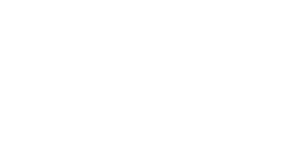

In [69]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hz1_x,hz1_y,hz1_z)
ax.scatter(hz3_x,hz3_y,hz3_z)
ax.scatter(hz5_x,hz5_y,hz5_z)
ax.scatter(hz7_x,hz7_y,hz7_z)
ax.scatter(hz10_x,hz10_y,hz10_z)
ax.scatter(f_x,f_y,f_z,)
#ax.scatter(f_x,f_y,f_z,c=np.linalg.norm([f_x,f_y,f_z], axis=0))

fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 2 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size) 

<IPython.core.display.Javascript object>


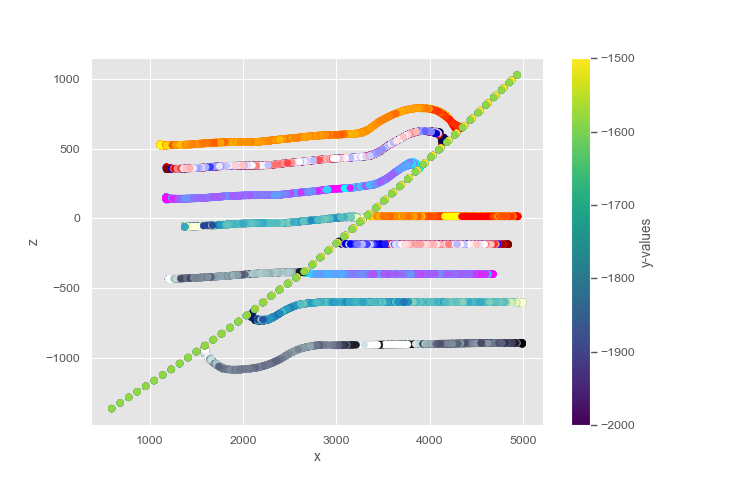

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_2364\2052656806.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im, label="y-values")


In [77]:
%matplotlib notebook
im = plt.scatter(hz1_x,hz1_z, c=hz1_y,cmap="autumn")
im = plt.scatter(hz3_x,hz3_z, c=hz3_y,cmap="seismic")
im = plt.scatter(hz5_x,hz5_z, c=hz5_y,cmap="cool")
im = plt.scatter(hz7_x,hz7_z, c=hz7_y,cmap="YlGnBu")
im = plt.scatter(hz10_x,hz10_z, c=hz10_y,cmap="bone")
im = plt.scatter(f_x,f_z,c=f_y,cmap="viridis")
plt.colorbar(im, label="y-values")
plt.xlabel("x")
plt.ylabel("z");

fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 1.5 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size); 

#### Throw/Displacement calculation

Here we apply the same approach we adopt for the first model and replicate it for the multiple layers. We start by calculating the distance by placing reference points “RP” on the top of the fault by indexing to get the first point in the fault data points. Then we get the first and last points in the horizons data to get the throw.

In [78]:
RP = f_z[-1]

hz1_zhw = max(hz1_z)
hz1_zfw = min(hz1_z)
throw_hz1 = hz1_zhw - hz1_zfw
dist_hz1 = RP - hz1_zhw

hz3_zhw = max(hz3_z)
hz3_zfw = min(hz3_z)
throw_hz3 = hz3_zhw - hz3_zfw
dist_hz3 = RP - hz3_zhw

hz5_zhw = max(hz5_z)
hz5_zfw = min(hz5_z)
throw_hz5 = hz5_zhw - hz5_zfw
dist_hz5 = RP - hz5_zhw

hz7_zhw = max(hz7_z)
hz7_zfw = min(hz7_z)
throw_hz7 = hz7_zhw - hz7_zfw
dist_hz7 = RP - hz7_zhw

hz10_zhw = max(hz10_z)
hz10_zfw = min(hz10_z)
throw_hz10 = hz10_zhw - hz10_zfw
dist_hz10 = RP - hz10_zhw

Let us preview and check a few points.

In [79]:
print("RP: " + format(RP))
print("throw_hz10: " + format(throw_hz10))
print("distance_hz10: " + format(dist_hz10))

RP: 1028.0045
throw_hz10: 703.0227
distance_hz10: 1410.1061


#### Plotting the Displacement Distance throw

Let us start by defining few parameters as a user define.

In [73]:
throw_hz5

zero = 0
upper_tip = 0
lower_tip = 0
fault_dist = 1750

Let us start by defining a few parameters as a user-defined.

In [74]:
dist = [float(zero), dist_hz1, dist_hz3, dist_hz5, dist_hz7, dist_hz10, float(fault_dist)]
throw = [float(upper_tip), throw_hz1, throw_hz3, throw_hz5, throw_hz7, throw_hz10, float(lower_tip)]

In [75]:
print(dist)
print(throw)

[0.0, 236.95450000000005, 398.7748, 622.5029, 1012.0451, 1410.1061, 1750.0]
[0.0, 776.5686999999999, 814.7771, 805.5176, 752.2094, 703.0227, 0.0]


Finally, we plot the displacement distance profile and colour the background with any other information such as the lithology.

<IPython.core.display.Javascript object>


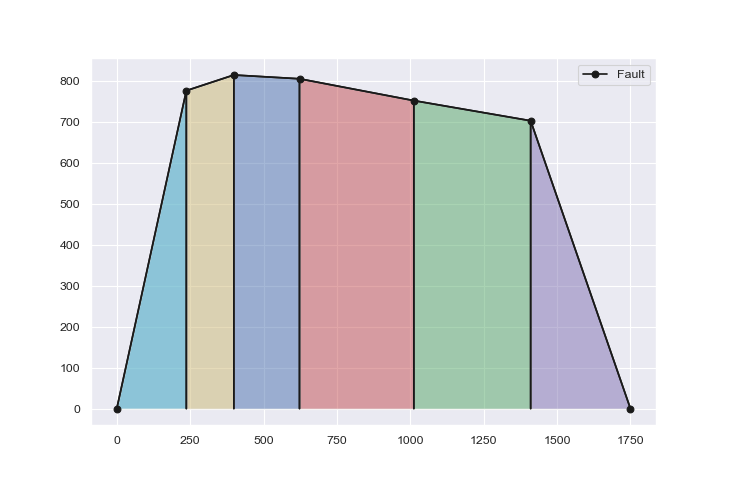

In [76]:
%matplotlib notebook

x = dist
y = throw
ax2 = plt.axes()
ax2.plot(x, y, '-ok', label='Fault')

c= [622.5, 622.5, 1012.05,1012.05]
b = [0,805.52,752.21,0]
f = [0, 236.9545, 236.9545]
g = [0, 776.56869, 0]
d = [1012.05,1012.05,1410.10,1410.10]
e = [0,752.21,703.02,0]
h = [1410.10, 1410.10, 1750]
i = [0, 703.02, 0]
j= [236.9545,236.9545,398.7748,398.7748]
k = [0,776.56869,814.7771,0]
l= [398.8,398.8,622.5,622.5]
m = [0,814.7771,805.5176,0]

ax2.plot(j, k, '-k')
ax2.plot(l, m, '-k')
ax2.plot(c, b, '-k')
ax2.plot(h, i, '-k')
ax2.plot(d, e, '-k')
ax2.plot(f, g, '-k')
ax2.fill_between(c, b, facecolor='r', alpha=0.5)
ax2.fill_between(l, m, facecolor='b', alpha=0.5)
ax2.fill_between(j, k, facecolor='y', alpha=0.5)
ax2.fill_between(f, g, facecolor='c', alpha=0.7)
ax2.fill_between(h, i, facecolor='m', alpha=0.5)
ax2.fill_between(d, e, facecolor='g', alpha=0.5)

leg = ax2.legend()
style.use('ggplot')

fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 1.5 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size) 

## Conclusions

1. Explore how to read, clean, prepare and visualise 2D subsurface models with one and multiple layers for structural analysis.

2. This study develops an intuitive new approach to automatically calculating the throw and displacement to apply structural analysis.

3. Create a Python model by writing a script to calculate the throw, displacement, and distance from a reference point on a fault plane with one horizon or layer on a synthetic model.

4. Generate a Python model to calculate the displacement and throw from a multi-layered model.

5. This intuitive approach can be applied in subsurface models to automatically calculate thrust faults’ throw and displacement.

![](https://i.imgur.com/aDe5lJx.png)

***Thank you!***